# **4.** K-Means Clustering

---

<p align="justify">

**Algoritma K-Means** merupakan salah satu algoritma Clustering yang masuk ke dalam kelompok Unsupervised learning. **K-Means** digunakan dengan mengelompokkan data yang memiliki kemiripan berada dalam 1 kelompok dan memisahkan data yang berbeda kedalam kelompok yang berbeda.
</p>

## Load Dataset

> Import dataset Iris dan menambahkan column

In [63]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#the imported dataset does not have the required column names so lets add it
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
irisdata = pd.read_csv(url, names=colnames)

In [64]:
irisdata

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Preprocessing

> Preprocessing dengan menggunakan library Pandas

In [65]:
irisdata['Class'] = pd.Categorical(irisdata["Class"])
irisdata["Class"] = irisdata["Class"].cat.codes

In [66]:
irisdata

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Inisialisasi Data

> Inisialisasi data kedalam variabel X dan Y

> Data X merupakan dataset Iris sedangkan data Y merupakan class atau tabel

In [67]:
X = irisdata.values[:, 0:4]
y = irisdata.values[:, 4]

## Modelling

In [68]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## Visualisasi Data

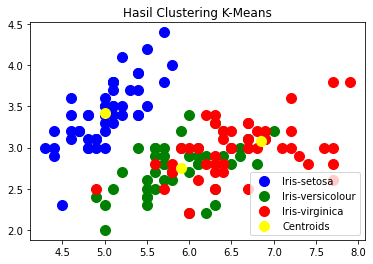

In [69]:
#Visualising the clusters
plt.title("Hasil Clustering K-Means")
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'red', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## Test Akurasi

In [70]:
from sklearn.metrics import classification_report

target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

print(classification_report(irisdata['Class'],kmeans.labels_,target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       0.00      0.00      0.00        50
Iris-versicolor       0.00      0.00      0.00        50
 Iris-virginica       0.95      0.72      0.82        50

       accuracy                           0.24       150
      macro avg       0.32      0.24      0.27       150
   weighted avg       0.32      0.24      0.27       150



In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(irisdata['Class'], labels)

0.24